In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
dataset="C:\\Users\\aryan\\Group4-Codes\\normal"
imagePaths=list(paths.list_images(dataset))


data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(600,600))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)


In [5]:
len(data)

186

In [6]:
labels[0]

'normal'

In [7]:
dataset="C:\\Users\\aryan\\Group4-Codes\\osteporosis"
imagePaths=list(paths.list_images(dataset))

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(600,600))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [8]:
len(data)

372

In [9]:
labels[200]

'osteporosis'

In [10]:
data=np.array(data,dtype='float32')
labels=np.array(labels)
len(data)

372

In [11]:
data.shape

(372, 600, 600, 3)

In [12]:
labels.shape

(372,)

In [13]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
#labels=to_categorical(labels)
labels.shape

(372, 1)

In [14]:
#labels=to_categorical(labels)
labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [15]:
dev_X,test_X,dev_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [16]:
train_X, valid_X, train_Y, valid_Y = train_test_split(dev_X,dev_Y,test_size=0.125, random_state=10)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,brightness_range=[0.5,1.5],fill_mode='nearest')

In [18]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(600,600,3)))

print(baseModel.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 300, 300, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 300, 300, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_2_add (Add)              (None, 150, 150, 24  0           ['block_1_project_BN[0][0]',     
                                )                                 'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, 150, 150, 14  3456        ['block_2_add[0][0]']            
                                4)                                                                
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, 150, 150, 14  576        ['block_3_expand[0][0]']         
 ization)                       4)                                                                
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 150, 150, 14  0           ['block_3_expand_BN[0][0]']      
          

 block_6_depthwise (DepthwiseCo  (None, 38, 38, 192)  1728       ['block_6_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_6_depthwise_BN (BatchNor  (None, 38, 38, 192)  768        ['block_6_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_6_depthwise_relu (ReLU)  (None, 38, 38, 192)  0           ['block_6_depthwise_BN[0][0]']   
                                                                                                  
 block_6_project (Conv2D)       (None, 38, 38, 64)   12288       ['block_6_depthwise_relu[0][0]'] 
                                                                                                  
 block_6_p

                                                                                                  
 block_10_expand_BN (BatchNorma  (None, 38, 38, 384)  1536       ['block_10_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_10_expand_relu (ReLU)    (None, 38, 38, 384)  0           ['block_10_expand_BN[0][0]']     
                                                                                                  
 block_10_depthwise (DepthwiseC  (None, 38, 38, 384)  3456       ['block_10_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_10_depthwise_BN (BatchNo  (None, 38, 38, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalizati

                                                                                                  
 block_13_project_BN (BatchNorm  (None, 19, 19, 160)  640        ['block_13_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_expand (Conv2D)       (None, 19, 19, 960)  153600      ['block_13_project_BN[0][0]']    
                                                                                                  
 block_14_expand_BN (BatchNorma  (None, 19, 19, 960)  3840       ['block_14_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_14_expand_relu (ReLU)    (None, 19, 19, 960)  0           ['block_14_expand_BN[0][0]']     
          

In [19]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.2)(headModel)
headModel=Dense(1,activation='sigmoid')(headModel)

In [20]:
model=Model(inputs=baseModel.input,outputs=headModel)

In [21]:
for layer in baseModel.layers:
    layer.trainable=False

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 300, 300, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 300, 300, 32  128         ['Conv1[0][0]']                  
                                )                                                             

                                                                                                  
 block_3_expand (Conv2D)        (None, 150, 150, 14  3456        ['block_2_add[0][0]']            
                                4)                                                                
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, 150, 150, 14  576        ['block_3_expand[0][0]']         
 ization)                       4)                                                                
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 150, 150, 14  0           ['block_3_expand_BN[0][0]']      
                                4)                                                                
                                                                                                  
 block_3_p

                                                                                                  
 block_6_depthwise_BN (BatchNor  (None, 38, 38, 192)  768        ['block_6_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_6_depthwise_relu (ReLU)  (None, 38, 38, 192)  0           ['block_6_depthwise_BN[0][0]']   
                                                                                                  
 block_6_project (Conv2D)       (None, 38, 38, 64)   12288       ['block_6_depthwise_relu[0][0]'] 
                                                                                                  
 block_6_project_BN (BatchNorma  (None, 38, 38, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
          

 lization)                                                                                        
                                                                                                  
 block_10_expand_relu (ReLU)    (None, 38, 38, 384)  0           ['block_10_expand_BN[0][0]']     
                                                                                                  
 block_10_depthwise (DepthwiseC  (None, 38, 38, 384)  3456       ['block_10_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_10_depthwise_BN (BatchNo  (None, 38, 38, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_

 alization)                                                                                       
                                                                                                  
 block_14_expand (Conv2D)       (None, 19, 19, 960)  153600      ['block_13_project_BN[0][0]']    
                                                                                                  
 block_14_expand_BN (BatchNorma  (None, 19, 19, 960)  3840       ['block_14_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_14_expand_relu (ReLU)    (None, 19, 19, 960)  0           ['block_14_expand_BN[0][0]']     
                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 19, 19, 960)  8640       ['block_14_expand_relu[0][0]']   
 onv2D)   

                                                                                                  
 dropout (Dropout)              (None, 128)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1)            129         ['dropout[0][0]']                
                                                                                                  
Total params: 2,913,601
Trainable params: 655,617
Non-trainable params: 2,257,984
__________________________________________________________________________________________________
None


In [22]:
learning_rate=0.001
Epochs=50
BS=16

In [23]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(valid_X,valid_Y),
    validation_steps=len(valid_X)//BS,
    epochs=Epochs
)

D:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
16/16 [==============================] - 42s 2s/step - loss: 0.9603 - accuracy: 0.6296 - val_loss: 0.5298 - val_accuracy: 0.8421
Epoch 2/50
16/16 [==============================] - 33s 2s/step - loss: 0.6696 - accuracy: 0.7160 - val_loss: 0.5423 - val_accuracy: 0.7632
Epoch 3/50
16/16 [==============================] - 33s 2s/step - loss: 0.6181 - accuracy: 0.7078 - val_loss: 0.4768 - val_accuracy: 0.8158
Epoch 4/50
16/16 [==============================] - 33s 2s/step - loss: 0.5188 - accuracy: 0.7531 - val_loss: 0.5008 - val_accuracy: 0.8158
Epoch 5/50
16/16 [==============================] - 33s 2s/step - loss: 0.5359 - accuracy: 0.7243 - val_loss: 0.4852 - val_accuracy: 0.8158
Epoch 6/50
16/16 [==============================] - 32s 2s/step - loss: 0.5033 - accuracy: 0.7490 - val_loss: 0.5126 - val_accuracy: 0.8158
Epoch 7/50
16/16 [==============================] - 33s 2s/step - loss: 0.5409 - accuracy: 0.7449 - val_loss: 0.5291 - val_accuracy: 0.8158
Epoch 8/50
16/16 [==

In [24]:
print(train_Y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]


In [25]:
predict=model.predict(test_X,batch_size=BS)
predict=np.round_(predict)
print(classification_report(test_Y,predict,target_names=lb.classes_))

5/5 [==============================] - 7s 1s/step
              precision    recall  f1-score   support

      normal       0.88      0.57      0.69        37
 osteporosis       0.69      0.92      0.79        38

    accuracy                           0.75        75
   macro avg       0.78      0.74      0.74        75
weighted avg       0.78      0.75      0.74        75



In [26]:
#predict=np.round_(predict)
#predict

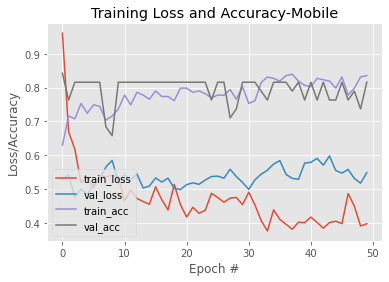

In [32]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy-Mobile")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

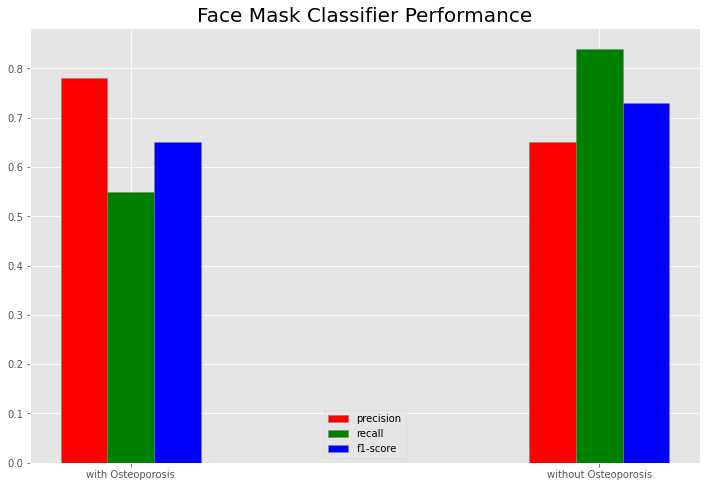

In [28]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

precision = [0.78, 0.65]
recall = [0.55, 0.84]
f1 = [0.65, 0.73]

br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, precision, color ='r', width = barWidth, edgecolor ='grey', label ='precision')
plt.bar(br2, recall, color ='g', width = barWidth, edgecolor ='grey', label ='recall')
plt.bar(br3, f1, color ='b', width = barWidth, edgecolor ='grey', label ='f1-score')

plt.title("Face Mask Classifier Performance", fontsize = 20)
plt.xticks([r + barWidth for r in range(len(precision))],
        ['with Osteoporosis', 'without Osteoporosis'])
 
plt.legend()
plt.show()

In [29]:
save_path = './Osteoporosis_Classification_MobileNet_model.h5'
model.save(save_path)